In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
from scipy.stats import spearmanr
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
import sys
reload(sys)
sys.setdefaultencoding("utf-8")
%matplotlib inline

In [2]:
restViolNT = pd.read_csv('restViolNT.csv')
restViolNT.head()

,Unnamed: 0,boro_code,boro_ct201,boro_name,ct2010,geometry,shape_area,bct,Year,Borough,Population,rest_Violations
0,0,5,5000900,Staten Island,900,POLYGON ((-74.07920577013245 40.64343078374567...,2.497010e+06,5900,2010,Staten Island,2112,0.0
1,1,1,1009800,Manhattan,9800,POLYGON ((-73.96432543478758 40.75638153099091...,1.906016e+06,19800,2010,Manhattan,7316,1259.0
2,2,1,1010000,Manhattan,10000,POLYGON ((-73.96802436915851 40.75957814005282...,1.860938e+06,110000,2010,Manhattan,1992,921.0
3,3,1,1010200,Manhattan,10200,POLYGON ((-73.97124277307127 40.76093641847906...,1.860993e+06,110200,2010,Manhattan,230,546.0
4,4,1,1010400,Manhattan,10400,POLYGON ((-73.97445730550224 40.76229308352487...,1.864600e+06,110400,2010,Manhattan,966,1026.0


In [3]:
dataPoisNT = pd.read_csv('dataPoisNT.csv')
data311compNT = pd.read_csv('data311compNT.csv')
data311compNT.rename(columns={'pois_complaints':'311complaints'}, inplace=True)
dataPoisNT.head()

,Unnamed: 0,boro_code,boro_ct201,boro_name,ct2010,geometry,shape_area,bct,Year,Borough,Population,pois_complaints
0,0,5,5000900,Staten Island,900,POLYGON ((-74.07920577013245 40.64343078374567...,2.497010e+06,5900,2010,Staten Island,2112,1.0
1,1,1,1009800,Manhattan,9800,POLYGON ((-73.96432543478758 40.75638153099091...,1.906016e+06,19800,2010,Manhattan,7316,69.0
2,2,1,1010000,Manhattan,10000,POLYGON ((-73.96802436915851 40.75957814005282...,1.860938e+06,110000,2010,Manhattan,1992,72.0
3,3,1,1010200,Manhattan,10200,POLYGON ((-73.97124277307127 40.76093641847906...,1.860993e+06,110200,2010,Manhattan,230,41.0
4,4,1,1010400,Manhattan,10400,POLYGON ((-73.97445730550224 40.76229308352487...,1.864600e+06,110400,2010,Manhattan,966,59.0


In [4]:
dataPoisNT = dataPoisNT[['boro_ct201', 'pois_complaints']]
data311compNT = data311compNT[['boro_ct201', '311complaints']]

In [5]:
combTemp = restViolNT.merge(dataPoisNT, on='boro_ct201', how='outer')
AllNT = combTemp.merge(data311compNT, on='boro_ct201', how='outer')

AllNT.fillna(value={'rest_Violations':0, 'pois_complaints':0, '311complaints':0}, inplace=True)

AllNT.head()

,Unnamed: 0,boro_code,boro_ct201,boro_name,ct2010,geometry,shape_area,bct,Year,Borough,Population,rest_Violations,pois_complaints,311complaints
0,0,5,5000900,Staten Island,900,POLYGON ((-74.07920577013245 40.64343078374567...,2.497010e+06,5900,2010,Staten Island,2112,0.0,1.0,1.0
1,1,1,1009800,Manhattan,9800,POLYGON ((-73.96432543478758 40.75638153099091...,1.906016e+06,19800,2010,Manhattan,7316,1259.0,69.0,102.0
2,2,1,1010000,Manhattan,10000,POLYGON ((-73.96802436915851 40.75957814005282...,1.860938e+06,110000,2010,Manhattan,1992,921.0,72.0,108.0
3,3,1,1010200,Manhattan,10200,POLYGON ((-73.97124277307127 40.76093641847906...,1.860993e+06,110200,2010,Manhattan,230,546.0,41.0,79.0
4,4,1,1010400,Manhattan,10400,POLYGON ((-73.97445730550224 40.76229308352487...,1.864600e+06,110400,2010,Manhattan,966,1026.0,59.0,81.0


In [6]:
AllNT[['Population', 'rest_Violations', 'pois_complaints', '311complaints']].corr()

,Population,rest_Violations,pois_complaints,311complaints
Population,1.000000,0.261593,0.272195,0.316744
rest_Violations,0.261593,1.000000,0.872952,0.865166
pois_complaints,0.272195,0.872952,1.000000,0.860163
311complaints,0.316744,0.865166,0.860163,1.000000


In [7]:
rests = pd.read_csv('NrestsFinal.csv')
AllNT = AllNT.merge(rests, on='boro_ct201', how='outer')
AllNT.fillna(value={'CAMIS':0}, inplace=True)
AllNT.drop(columns={'Unnamed: 0_x', 'Unnamed: 0_y'}, inplace=True)
#AllNT['Nrestaurants'] = AllNT['Nrestaurants']*7
AllNT.head()

,boro_code,boro_ct201,boro_name,ct2010,geometry,shape_area,bct,Year,Borough,Population,rest_Violations,pois_complaints,311complaints,CAMIS
0,5,5000900,Staten Island,900,POLYGON ((-74.07920577013245 40.64343078374567...,2.497010e+06,5900,2010,Staten Island,2112,0.0,1.0,1.0,0.0
1,1,1009800,Manhattan,9800,POLYGON ((-73.96432543478758 40.75638153099091...,1.906016e+06,19800,2010,Manhattan,7316,1259.0,69.0,102.0,120.0
2,1,1010000,Manhattan,10000,POLYGON ((-73.96802436915851 40.75957814005282...,1.860938e+06,110000,2010,Manhattan,1992,921.0,72.0,108.0,104.0
3,1,1010200,Manhattan,10200,POLYGON ((-73.97124277307127 40.76093641847906...,1.860993e+06,110200,2010,Manhattan,230,546.0,41.0,79.0,74.0
4,1,1010400,Manhattan,10400,POLYGON ((-73.97445730550224 40.76229308352487...,1.864600e+06,110400,2010,Manhattan,966,1026.0,59.0,81.0,117.0


In [8]:
AllNT.shape

(2166, 14)

In [9]:
neighbors = pd.read_csv('neighbors.csv')
neighbors.drop(columns={'Unnamed: 0'}, inplace=True)
AllNT = AllNT.merge(neighbors, on='boro_ct201')
AllNT.head()

,boro_code,boro_ct201,boro_name,ct2010,geometry,shape_area,bct,Year,Borough,Population,rest_Violations,pois_complaints,311complaints,CAMIS,NEIGHBORS,NeighbPois,NeighPop
0,5,5000900,Staten Island,900,POLYGON ((-74.07920577013245 40.64343078374567...,2.497010e+06,5900,2010,Staten Island,2112,0.0,1.0,1.0,0.0,"[5000900, 5001100, 5007700, 5000300, 5000700, ...",35.0,18777
1,1,1009800,Manhattan,9800,POLYGON ((-73.96432543478758 40.75638153099091...,1.906016e+06,19800,2010,Manhattan,7316,1259.0,69.0,102.0,120.0,"[1009800, 1010000, 1010601, 1009200, 1009000, ...",291.0,40186
2,1,1010000,Manhattan,10000,POLYGON ((-73.96802436915851 40.75957814005282...,1.860938e+06,110000,2010,Manhattan,1992,921.0,72.0,108.0,104.0,"[1009800, 1010000, 1010200, 1009200, 1009000, ...",386.0,30181
3,1,1010200,Manhattan,10200,POLYGON ((-73.97124277307127 40.76093641847906...,1.860993e+06,110200,2010,Manhattan,230,546.0,41.0,79.0,74.0,"[1010000, 1010200, 1010400, 1009200, 1011202, ...",424.0,8056
4,1,1010400,Manhattan,10400,POLYGON ((-73.97445730550224 40.76229308352487...,1.864600e+06,110400,2010,Manhattan,966,1026.0,59.0,81.0,117.0,"[1010200, 1010400, 1012500, 1013100, 1011202, ...",492.0,14863


In [10]:
NrestWviol = pd.read_csv('NrestWviol.csv')
NrestWviol.drop(columns={'Unnamed: 0'}, inplace=True)
AllNT = AllNT.merge(NrestWviol, on='boro_ct201', how='outer')
AllNT.fillna(value={'NrestWviol':0}, inplace=True)
AllNT.head()

,boro_code,boro_ct201,boro_name,ct2010,geometry,shape_area,bct,Year,Borough,Population,rest_Violations,pois_complaints,311complaints,CAMIS,NEIGHBORS,NeighbPois,NeighPop,NrestWviol
0,5,5000900,Staten Island,900,POLYGON ((-74.07920577013245 40.64343078374567...,2.497010e+06,5900,2010,Staten Island,2112,0.0,1.0,1.0,0.0,"[5000900, 5001100, 5007700, 5000300, 5000700, ...",35.0,18777,0.0
1,1,1009800,Manhattan,9800,POLYGON ((-73.96432543478758 40.75638153099091...,1.906016e+06,19800,2010,Manhattan,7316,1259.0,69.0,102.0,120.0,"[1009800, 1010000, 1010601, 1009200, 1009000, ...",291.0,40186,118.0
2,1,1010000,Manhattan,10000,POLYGON ((-73.96802436915851 40.75957814005282...,1.860938e+06,110000,2010,Manhattan,1992,921.0,72.0,108.0,104.0,"[1009800, 1010000, 1010200, 1009200, 1009000, ...",386.0,30181,97.0
3,1,1010200,Manhattan,10200,POLYGON ((-73.97124277307127 40.76093641847906...,1.860993e+06,110200,2010,Manhattan,230,546.0,41.0,79.0,74.0,"[1010000, 1010200, 1010400, 1009200, 1011202, ...",424.0,8056,69.0
4,1,1010400,Manhattan,10400,POLYGON ((-73.97445730550224 40.76229308352487...,1.864600e+06,110400,2010,Manhattan,966,1026.0,59.0,81.0,117.0,"[1010200, 1010400, 1012500, 1013100, 1011202, ...",492.0,14863,104.0


In [11]:
AllNT[['rest_Violations', 'pois_complaints', '311complaints', 'CAMIS', 'NeighbPois', 'NeighPop', 'Population', 
       'NrestWviol']].corr()

,rest_Violations,pois_complaints,311complaints,CAMIS,NeighbPois,NeighPop,Population,NrestWviol
rest_Violations,1.000000,0.872952,0.865166,0.970898,0.750140,0.268590,0.261593,0.976710
pois_complaints,0.872952,1.000000,0.860163,0.885028,0.800271,0.306274,0.272195,0.885771
311complaints,0.865166,0.860163,1.000000,0.855417,0.700155,0.314700,0.316744,0.861510
CAMIS,0.970898,0.885028,0.855417,1.000000,0.768791,0.246765,0.219654,0.998034
NeighbPois,0.750140,0.800271,0.700155,0.768791,1.000000,0.411476,0.197214,0.771556
NeighPop,0.268590,0.306274,0.314700,0.246765,0.411476,1.000000,0.507066,0.251556
Population,0.261593,0.272195,0.316744,0.219654,0.197214,0.507066,1.000000,0.227500
NrestWviol,0.976710,0.885771,0.861510,0.998034,0.771556,0.251556,0.227500,1.000000


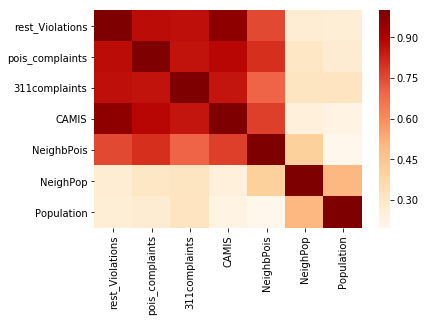

In [12]:
sns.heatmap(AllNT[['rest_Violations', 'pois_complaints', '311complaints', 'CAMIS', 'NeighbPois', 'NeighPop', 'Population']].corr()
           , cmap='OrRd')

In [13]:
AllNT.describe()

,boro_code,boro_ct201,ct2010,shape_area,bct,Year,Population,rest_Violations,pois_complaints,311complaints,CAMIS,NeighbPois,NeighPop,NrestWviol
count,2166.000000,2.166000e+03,2166.000000,2.166000e+03,2.166000e+03,2166.0,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000
mean,2.988458,3.030209e+06,41750.830563,3.891692e+06,5.641257e+05,2010.0,3774.299631,117.043860,7.493536,15.532779,11.637581,56.603878,26963.473684,11.322715
std,1.096438,1.108559e+06,39847.100208,7.965941e+06,9.563291e+05,0.0,2176.121971,191.938429,11.926089,22.547411,19.280266,73.503195,11810.152192,18.559852
min,1.000000,1.000100e+06,100.000000,5.819571e+02,1.100000e+03,2010.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.036325e+06,15525.000000,1.683579e+06,2.147012e+05,2010.0,2259.000000,18.000000,1.000000,3.000000,2.000000,21.000000,18885.250000,2.000000
50%,3.000000,3.053050e+06,30250.000000,1.987942e+06,3.417500e+05,2010.0,3426.500000,58.000000,4.000000,8.000000,6.000000,36.000000,25316.000000,6.000000
75%,4.000000,4.034500e+06,58175.000000,3.189156e+06,4.433500e+05,2010.0,4814.000000,134.000000,9.000000,19.000000,13.000000,58.000000,32929.750000,13.000000
max,5.000000,5.990100e+06,990100.000000,1.962385e+08,5.990100e+06,2010.0,26588.000000,2134.000000,124.000000,292.000000,192.000000,603.000000,168704.000000,187.000000


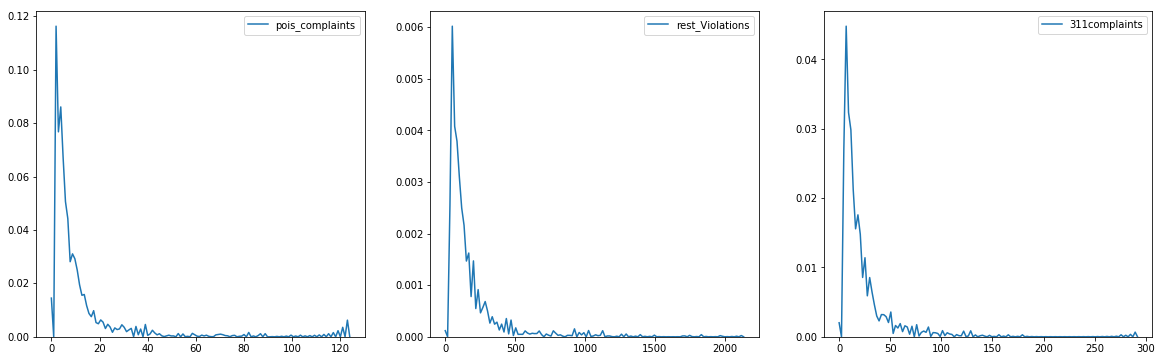

In [14]:
fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(131)
sns.kdeplot(AllNT['pois_complaints'], bw=0.005)

ax2 = fig.add_subplot(132)
sns.kdeplot(AllNT['rest_Violations'], bw=0.005)

ax2 = fig.add_subplot(133)
sns.kdeplot(AllNT['311complaints'], bw=0.005)

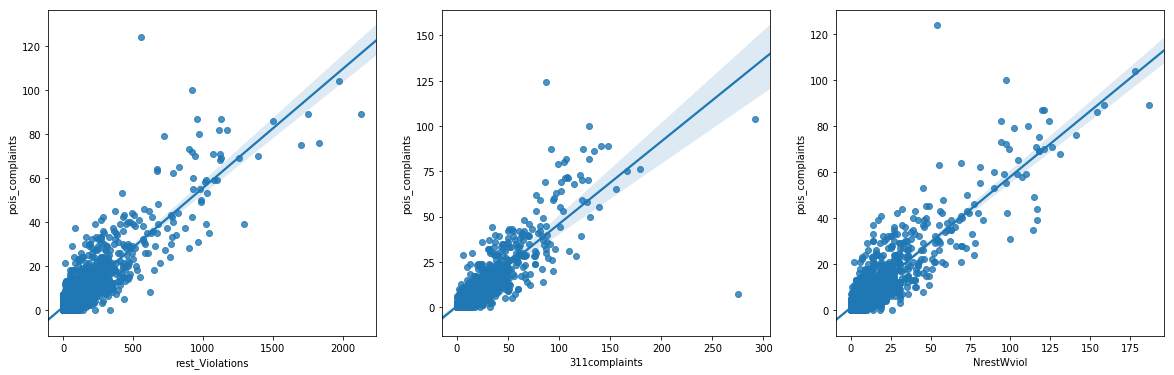

In [15]:
fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(131)
sns.regplot(AllNT['rest_Violations'], AllNT['pois_complaints'])

ax2 = fig.add_subplot(132)
sns.regplot(AllNT['311complaints'], AllNT['pois_complaints'])

ax2 = fig.add_subplot(133)
sns.regplot(AllNT['NrestWviol'], AllNT['pois_complaints'])

In [16]:
X = AllNT[['rest_Violations', '311complaints', 'Population', 'CAMIS', 'NrestWviol']]
X = sm.add_constant(X)
y = np.matrix(AllNT['pois_complaints']).T

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     2021.
Date:                Thu, 11 Apr 2019   Prob (F-statistic):               0.00
Time:                        09:25:22   Log-Likelihood:                -6560.9
No. Observations:                2166   AIC:                         1.313e+04
Df Residuals:                    2160   BIC:                         1.317e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2481      0.219     -1.135      0.257      -0.677       0.181
rest_Violations     0.0008      0.003      0.286      0.775      -0.005       0.006
311complaints       0.1972      0.010     19.956      0.000       0.178       0.217
Population          0.0002    5.3e-05      3.342      0.001    7.32e-05       0.000
CAMIS               0.4611      0.094      4.929      0.000       0.278       0.645
NrestWviol         -0.1282      0.109     -1.179      0.238      -0.341       0.085
==============================================================================
Omnibus:                     1596.446   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           265275.782
Skew:                           2.552   Prob(JB):                         0.00
Kurtosis:                      56.975   Cond. No.                     8.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
AllNT['violPres'] = AllNT['rest_Violations']/AllNT['CAMIS']
AllNT['poisPres'] = AllNT['pois_complaints']/AllNT['CAMIS']
AllNT['311compPres'] = AllNT['311complaints']/AllNT['CAMIS']
AllNT['badRestProp'] = AllNT['NrestWviol']/AllNT['CAMIS']
AllNT['poisPpop'] = AllNT['pois_complaints']/AllNT['Population']
AllNT['311Ppop'] = AllNT['311complaints']/AllNT['Population']
AllNT.head(3)

,boro_code,boro_ct201,boro_name,ct2010,geometry,shape_area,bct,Year,Borough,Population,...,NEIGHBORS,NeighbPois,NeighPop,NrestWviol,violPres,poisPres,311compPres,badRestProp,poisPpop,311Ppop
0,5,5000900,Staten Island,900,POLYGON ((-74.07920577013245 40.64343078374567...,2.497010e+06,5900,2010,Staten Island,2112,...,"[5000900, 5001100, 5007700, 5000300, 5000700, ...",35.0,18777,0.0,NaN,inf,inf,NaN,0.000473,0.000473
1,1,1009800,Manhattan,9800,POLYGON ((-73.96432543478758 40.75638153099091...,1.906016e+06,19800,2010,Manhattan,7316,...,"[1009800, 1010000, 1010601, 1009200, 1009000, ...",291.0,40186,118.0,10.491667,0.575000,0.850000,0.983333,0.009431,0.013942
2,1,1010000,Manhattan,10000,POLYGON ((-73.96802436915851 40.75957814005282...,1.860938e+06,110000,2010,Manhattan,1992,...,"[1009800, 1010000, 1010200, 1009200, 1009000, ...",386.0,30181,97.0,8.855769,0.692308,1.038462,0.932692,0.036145,0.054217


In [18]:
ct = gpd.read_file('/Users/devashishkhulbe/Downloads/Data/2010 Census Tracts/geo_export_a0d9c6b6-aa01-4614-864e-ae8521d74700.shp')
pop = pd.read_csv('/Users/devashishkhulbe/Downloads/Data/New_York_City_Population_By_Census_Tracts.csv')
ct = ct[['boro_code', 'boro_ct201', 'boro_name', 'ct2010', 'geometry', 'shape_area']]
ct['ct2010'] = ct['ct2010'].astype(int)
pop = pop[pop.Year == 2010]
ct['bct'] = ct['boro_code'].astype(str) + ct['ct2010'].astype(str)
pop['bct'] = pop['DCP Borough Code'].astype(str) + pop['Census Tract'].astype(str)
pop = pop[['bct', 'Year', 'Borough', 'Population']]
ct = ct.merge(pop, on='bct')
ct['boro_ct201'] = ct['boro_ct201'].astype(int)
ct.head()

,boro_code,boro_ct201,boro_name,ct2010,geometry,shape_area,bct,Year,Borough,Population
0,5,5000900,Staten Island,900,POLYGON ((-74.07920577013245 40.64343078374567...,2.497010e+06,5900,2010,Staten Island,2112
1,1,1009800,Manhattan,9800,POLYGON ((-73.96432543478758 40.75638153099091...,1.906016e+06,19800,2010,Manhattan,7316
2,1,1010000,Manhattan,10000,POLYGON ((-73.96802436915851 40.75957814005282...,1.860938e+06,110000,2010,Manhattan,1992
3,1,1010200,Manhattan,10200,POLYGON ((-73.97124277307127 40.76093641847906...,1.860993e+06,110200,2010,Manhattan,230
4,1,1010400,Manhattan,10400,POLYGON ((-73.97445730550224 40.76229308352487...,1.864600e+06,110400,2010,Manhattan,966


In [19]:
type(ct)

geopandas.geodataframe.GeoDataFrame

In [20]:
AllNT.replace([np.inf, -np.inf], np.nan, inplace=True)
AllNT.dropna(subset=["poisPres", "violPres", '311compPres', 'badRestProp', 'poisPpop', '311Ppop'],
                                                inplace=True)

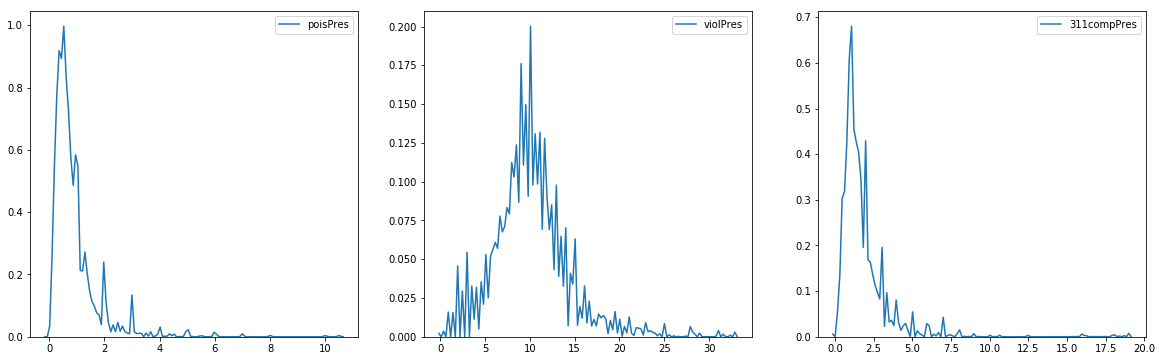

In [21]:
fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(131)
sns.kdeplot(AllNT['poisPres'], bw=0.05)

ax2 = fig.add_subplot(132)
sns.kdeplot(AllNT['violPres'], bw=0.05)

ax2 = fig.add_subplot(133)
sns.kdeplot(AllNT['311compPres'], bw=0.05)

In [22]:
AllNT[['violPres', 'poisPres', '311compPres', 'badRestProp', 'CAMIS', 'poisPpop', 'Population']].corr()

,violPres,poisPres,311compPres,badRestProp,CAMIS,poisPpop,Population
violPres,1.000000,0.047482,0.075111,0.217377,-0.022520,-0.013627,0.090311
poisPres,0.047482,1.000000,0.526459,-0.024401,-0.135745,0.050337,0.066670
311compPres,0.075111,0.526459,1.000000,0.036749,-0.166450,-0.003345,0.091821
badRestProp,0.217377,-0.024401,0.036749,1.000000,-0.027281,-0.025355,0.023516
CAMIS,-0.022520,-0.135745,-0.166450,-0.027281,1.000000,0.124144,0.194649
poisPpop,-0.013627,0.050337,-0.003345,-0.025355,0.124144,1.000000,-0.125243
Population,0.090311,0.066670,0.091821,0.023516,0.194649,-0.125243,1.000000


In [35]:
AllNT.columns

Index([u'boro_code', u'boro_ct201', u'boro_name', u'ct2010', u'shape_area',
       u'bct', u'Year', u'Borough', u'Population', u'rest_Violations',
       u'pois_complaints', u'311complaints', u'CAMIS', u'NEIGHBORS',
       u'NeighbPois', u'NeighPop', u'NrestWviol', u'violPres', u'poisPres',
       u'311compPres', u'badRestProp', u'poisPpop', u'311Ppop', u'Tot311comp',
       u'311Prop'],
      dtype='object')

In [37]:
X = AllNT[['violPres', '311Ppop', 'badRestProp', '311Prop']]
X = sm.add_constant(X)
y = np.matrix(AllNT['poisPpop']).T

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1799.
Date:                Thu, 11 Apr 2019   Prob (F-statistic):               0.00
Time:                        09:32:13   Log-Likelihood:                 3812.9
No. Observations:                1863   AIC:                            -7616.
Df Residuals:                    1858   BIC:                            -7588.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0149      0.010      1.561      0.119      -0.004       0.034
violPres       -0.0002      0.000     -1.320      0.187      -0.001       0.000
311Ppop         0.4609      0.005     83.910      0.000       0.450       0.472
badRestProp    -0.0108      0.010     -1.082      0.279      -0.030       0.009
311Prop        -0.0900      0.193     -0.466      0.641      -0.469       0.289
==============================================================================
Omnibus:                     4546.813   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         44046156.954
Skew:                          24.726   Prob(JB):                         0.00
Kurtosis:                     754.649   Cond. No.                     2.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
data311elseCount = pd.read_csv('data311elseCount.csv')
AllNT = AllNT.merge(data311elseCount, on='boro_ct201', how='outer')
AllNT.head()

,boro_code,boro_ct201,boro_name,ct2010,geometry,shape_area,bct,Year,Borough,Population,...,NeighPop,NrestWviol,violPres,poisPres,311compPres,badRestProp,poisPpop,311Ppop,Unnamed: 0,Tot311comp
0,1.0,1009800,Manhattan,9800.0,POLYGON ((-73.96432543478758 40.75638153099091...,1.906016e+06,19800.0,2010.0,Manhattan,7316.0,...,40186.0,118.0,10.491667,0.575000,0.850000,0.983333,0.009431,0.013942,97,10319
1,1.0,1010000,Manhattan,10000.0,POLYGON ((-73.96802436915851 40.75957814005282...,1.860938e+06,110000.0,2010.0,Manhattan,1992.0,...,30181.0,97.0,8.855769,0.692308,1.038462,0.932692,0.036145,0.054217,99,6074
2,1.0,1010200,Manhattan,10200.0,POLYGON ((-73.97124277307127 40.76093641847906...,1.860993e+06,110200.0,2010.0,Manhattan,230.0,...,8056.0,69.0,7.378378,0.554054,1.067568,0.932432,0.178261,0.343478,101,4570
3,1.0,1010400,Manhattan,10400.0,POLYGON ((-73.97445730550224 40.76229308352487...,1.864600e+06,110400.0,2010.0,Manhattan,966.0,...,14863.0,104.0,8.769231,0.504274,0.692308,0.888889,0.061077,0.083851,103,6037
4,1.0,1011300,Manhattan,11300.0,"POLYGON ((-73.98411754823195 40.7548420534646,...",1.890907e+06,111300.0,2010.0,Manhattan,117.0,...,17539.0,120.0,8.913386,0.685039,0.968504,0.944882,0.743590,1.051282,113,8575


In [25]:
AllNT.drop(columns={'Unnamed: 0'}, inplace=True)
AllNT.fillna(value={'Tot311comp':0}, inplace=True)

In [26]:
AllNT['311Prop'] = AllNT['311complaints']/AllNT['Tot311comp']
AllNT[['violPres', 'poisPres', '311compPres', 'badRestProp', 'CAMIS', '311Prop', 'poisPpop']].corr()

,violPres,poisPres,311compPres,badRestProp,CAMIS,311Prop,poisPpop
violPres,1.000000,0.047482,0.075111,0.217377,-0.022520,0.034366,-0.013627
poisPres,0.047482,1.000000,0.526459,-0.024401,-0.135745,0.023879,0.050337
311compPres,0.075111,0.526459,1.000000,0.036749,-0.166450,0.211325,-0.003345
badRestProp,0.217377,-0.024401,0.036749,1.000000,-0.027281,0.000561,-0.025355
CAMIS,-0.022520,-0.135745,-0.166450,-0.027281,1.000000,0.564450,0.124144
311Prop,0.034366,0.023879,0.211325,0.000561,0.564450,1.000000,0.128313
poisPpop,-0.013627,0.050337,-0.003345,-0.025355,0.124144,0.128313,1.000000


In [27]:
AllNT.dropna(subset=['311Prop'], inplace=True)

In [28]:
ct = ct[['boro_ct201', 'geometry']]
AllNT.drop(columns={'geometry'}, inplace=True)
AllNT1 = ct.merge(AllNT, on='boro_ct201')
AllNT1.replace([np.inf, -np.inf], np.nan, inplace=True)
AllNT1.dropna(subset=["poisPres", "violPres", '311compPres', 'badRestProp', 'poisPpop', '311Ppop'],
                                                inplace=True)
AllNT1.to_file('NT1/NT1.shp')

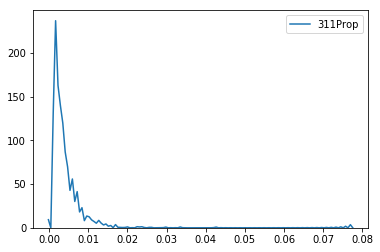

In [29]:
sns.kdeplot(AllNT['311Prop'], bw=0.00005)

In [30]:
X = AllNT[['violPres', '311compPres', 'badRestProp', '311Prop']]
X = sm.add_constant(X)
y = np.matrix(AllNT['poisPres']).T

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     187.4
Date:                Thu, 11 Apr 2019   Prob (F-statistic):          4.55e-135
Time:                        09:25:33   Log-Likelihood:                -2079.1
No. Observations:                1863   AIC:                             4168.
Df Residuals:                    1858   BIC:                             4196.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.8786      0.226      3.896      0.000       0.436       1.321
violPres        0.0043      0.004      1.006      0.314      -0.004       0.013
311compPres     0.3026      0.011     27.191      0.000       0.281       0.324
badRestProp    -0.5721      0.235     -2.433      0.015      -1.033      -0.111
311Prop       -21.2577      4.619     -4.602      0.000     -30.317     -12.198
==============================================================================
Omnibus:                     1148.841   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28796.576
Skew:                           2.445   Prob(JB):                         0.00
Kurtosis:                      21.630   Cond. No.                     3.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
AllNT[['violPres', 'poisPres', '311compPres', 'badRestProp', 'CAMIS', '311Prop', 'poisPpop', 'poisPres']].corr()

,violPres,poisPres,311compPres,badRestProp,CAMIS,311Prop,poisPpop,poisPres
violPres,1.000000,0.047482,0.075111,0.217377,-0.022520,0.034366,-0.013627,0.047482
poisPres,0.047482,1.000000,0.526459,-0.024401,-0.135745,0.023879,0.050337,1.000000
311compPres,0.075111,0.526459,1.000000,0.036749,-0.166450,0.211325,-0.003345,0.526459
badRestProp,0.217377,-0.024401,0.036749,1.000000,-0.027281,0.000561,-0.025355,-0.024401
CAMIS,-0.022520,-0.135745,-0.166450,-0.027281,1.000000,0.564450,0.124144,-0.135745
311Prop,0.034366,0.023879,0.211325,0.000561,0.564450,1.000000,0.128313,0.023879
poisPpop,-0.013627,0.050337,-0.003345,-0.025355,0.124144,0.128313,1.000000,0.050337
poisPres,0.047482,1.000000,0.526459,-0.024401,-0.135745,0.023879,0.050337,1.000000


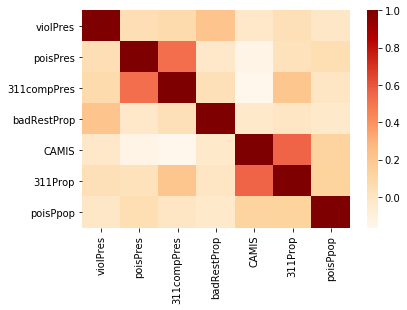

In [32]:
sns.heatmap(AllNT[['violPres', 'poisPres', '311compPres', 'badRestProp', 'CAMIS', '311Prop', 'poisPpop']].corr(), cmap='OrRd')

In [33]:
AllNT.poisPres.describe()

count    1863.000000
mean        0.816714
std         0.875320
min         0.000000
25%         0.333333
50%         0.600000
75%         1.000000
max        10.500000
Name: poisPres, dtype: float64

In [68]:
avgGrades = pd.read_csv('avgGrades.csv')
avgGrades.drop(columns={'Unnamed: 0'}, inplace=True)
AllNT = AllNT.merge(avgGrades, on='boro_ct201', how='outer')
AllNT.fillna(value={'avgGrade':np.mean(avgGrades.avgGrade.values)}, inplace=True)
avgGrades.head()

,avgGrade,boro_ct201
0,82.935323,1009800
1,81.990632,1010000
2,86.045016,1010200
3,81.159136,1010400
4,80.638686,1011300


In [69]:
AllNT.head()

,boro_code,boro_ct201,boro_name,ct2010,geometry,shape_area,bct,Year,Borough,Population,...,NeighPop,NrestWviol,violPres,poisPres,311compPres,badRestProp,poisPpop,Tot311comp,311Prop,avgGrade
0,1.0,1009800,Manhattan,9800.0,POLYGON ((-73.96432543478758 40.75638153099091...,1.906016e+06,19800.0,2010.0,Manhattan,7316.0,...,40186.0,118.0,0.172089,0.575000,0.013942,0.983333,0.009431,10319.0,0.009885,82.935323
1,1.0,1010000,Manhattan,10000.0,POLYGON ((-73.96802436915851 40.75957814005282...,1.860938e+06,110000.0,2010.0,Manhattan,1992.0,...,30181.0,97.0,0.462349,0.692308,0.054217,0.932692,0.036145,6074.0,0.017781,81.990632
2,1.0,1010200,Manhattan,10200.0,POLYGON ((-73.97124277307127 40.76093641847906...,1.860993e+06,110200.0,2010.0,Manhattan,230.0,...,8056.0,69.0,2.373913,0.554054,0.343478,0.932432,0.178261,4570.0,0.017287,86.045016
3,1.0,1010400,Manhattan,10400.0,POLYGON ((-73.97445730550224 40.76229308352487...,1.864600e+06,110400.0,2010.0,Manhattan,966.0,...,14863.0,104.0,1.062112,0.504274,0.083851,0.888889,0.061077,6037.0,0.013417,81.159136
4,1.0,1011300,Manhattan,11300.0,"POLYGON ((-73.98411754823195 40.7548420534646,...",1.890907e+06,111300.0,2010.0,Manhattan,117.0,...,17539.0,120.0,9.675214,0.685039,1.051282,0.944882,0.743590,8575.0,0.014344,80.638686


In [70]:
AllNT.badRestProp.describe()

count    1863.000000
mean        0.976855
std         0.074697
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: badRestProp, dtype: float64

In [71]:
AllNT[['poisPres', 'violPres', '311compPres', 'badRestProp', '311Prop', 'avgGrade']].corr()

,poisPres,violPres,311compPres,badRestProp,311Prop,avgGrade
poisPres,1.000000,0.004683,0.018646,-0.024401,0.023879,0.035811
violPres,0.004683,1.000000,0.918144,-0.019108,0.190917,-0.053925
311compPres,0.018646,0.918144,1.000000,-0.011890,0.149969,-0.053022
badRestProp,-0.024401,-0.019108,-0.011890,1.000000,0.000561,-0.055286
311Prop,0.023879,0.190917,0.149969,0.000561,1.000000,-0.077287
avgGrade,0.035811,-0.053925,-0.053022,-0.055286,-0.077287,1.000000


In [29]:
X = AllNT[['violPres', '311compPres', 'badRestProp', '311Prop', 'avgGrade']]
X = sm.add_constant(X)
y = np.matrix(AllNT['poisPres']).T

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     781.1
Date:                Sun, 07 Apr 2019   Prob (F-statistic):               0.00
Time:                        17:07:15   Log-Likelihood:                -940.87
No. Observations:                2163   AIC:                             1894.
Df Residuals:                    2157   BIC:                             1928.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0205      0.121     -0.170      0.865      -0.258       0.217
violPres        0.0006      0.003      0.226      0.821      -0.005       0.006
311compPres     0.2509      0.009     27.088      0.000       0.233       0.269
badRestProp     0.2850      0.028     10.071      0.000       0.230       0.341
311Prop        -2.5613      2.130     -1.203      0.229      -6.738       1.615
avgGrade        0.0008      0.001      0.541      0.589      -0.002       0.004
==============================================================================
Omnibus:                      735.449   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13213.591
Skew:                           1.130   Prob(JB):                         0.00
Kurtosis:                      14.896   Cond. No.                     2.21e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
majCuisine = pd.read_csv('majCuisine.csv')
majCuisine.drop(columns={'Unnamed: 0'}, inplace=True)

AllNT = AllNT.merge(majCuisine, on='boro_ct201', how='outer')
AllNT.fillna(value={'majCuisine':'American'}, inplace=True)
AllNT.head()

,boro_code,boro_ct201,boro_name,ct2010,geometry,shape_area,bct,Year,Borough,Population,...,NeighPop,NrestWviol,violPres,poisPres,311compPres,badRestProp,Tot311comp,311Prop,avgGrade,majCuisine
0,5,5000900,Staten Island,900,POLYGON ((-74.07920577013245 40.64343078374567...,2.497010e+06,5900,2010,Staten Island,2112,...,18777,0.0,0.000000,0.142857,0.142857,0.000000,5293.0,0.000189,82.960784,American
1,1,1009800,Manhattan,9800,POLYGON ((-73.96432543478758 40.75638153099091...,1.906016e+06,19800,2010,Manhattan,7316,...,40186,118.0,8.175325,0.448052,0.662338,0.766234,10319.0,0.009885,82.935323,American
2,1,1010000,Manhattan,10000,POLYGON ((-73.96802436915851 40.75957814005282...,1.860938e+06,110000,2010,Manhattan,1992,...,30181,97.0,14.619048,1.142857,1.714286,1.539683,6074.0,0.017781,81.990632,American
3,1,1010200,Manhattan,10200,POLYGON ((-73.97124277307127 40.76093641847906...,1.860993e+06,110200,2010,Manhattan,230,...,8056,69.0,13.000000,0.976190,1.880952,1.642857,4570.0,0.017287,86.045016,American
4,1,1010400,Manhattan,10400,POLYGON ((-73.97445730550224 40.76229308352487...,1.864600e+06,110400,2010,Manhattan,966,...,14863,104.0,5.862857,0.337143,0.462857,0.594286,6037.0,0.013417,81.159136,American


In [31]:
sum(AllNT['Nrestaurants'])

38325.0

In [32]:
counts = AllNT.groupby(by='majCuisine', as_index=False).count()[['majCuisine', 'Nrestaurants']].sort_values(by='Nrestaurants', ascending=False)
counts = counts[0:15]

<Figure size 720x720 with 0 Axes>

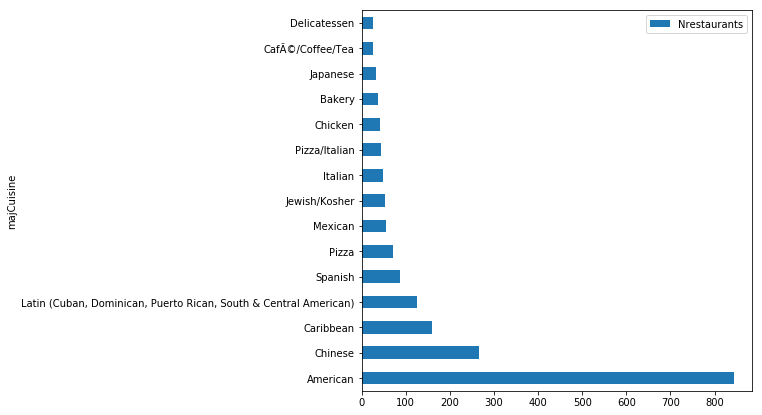

In [33]:
plt.figure(figsize=(10,10))
counts.plot.barh(x='majCuisine', rot=0, figsize=(7,7))

In [34]:
# #rest score?

In [35]:
scores = pd.read_csv('avgScore.csv')
scores.drop(columns={'Unnamed: 0'}, inplace=True)
scores.head()

,Score,boro_ct201
0,20.775656,1009800
1,21.704669,1010000
2,19.630037,1010200
3,20.904297,1010400
4,22.403183,1011300


In [36]:
scores.Score.describe()['mean']

20.089677681736138

In [37]:
AllNT = AllNT.merge(scores, on='boro_ct201', how='outer')
AllNT.fillna(value={'Score':scores.Score.describe()['mean']}, inplace=True)

In [42]:
AllNT[['poisPres', 'violPres', '311compPres', 'badRestProp', '311Prop', 'avgGrade', 'Score', 'poisPpop']].corr()

,poisPres,violPres,311compPres,badRestProp,311Prop,avgGrade,Score,poisPpop
poisPres,1.000000,0.695482,0.757735,0.709594,0.290142,-0.072222,0.073435,0.092686
violPres,0.695482,1.000000,0.707500,0.922807,0.279107,-0.208079,0.196562,0.028809
311compPres,0.757735,0.707500,1.000000,0.681348,0.397114,-0.100090,0.091973,0.049723
badRestProp,0.709594,0.922807,0.681348,1.000000,0.280875,-0.076877,0.082835,0.032257
311Prop,0.290142,0.279107,0.397114,0.280875,1.000000,-0.067005,0.055495,0.227348
avgGrade,-0.072222,-0.208079,-0.100090,-0.076877,-0.067005,1.000000,-0.472570,-0.046421
Score,0.073435,0.196562,0.091973,0.082835,0.055495,-0.472570,1.000000,0.011378
poisPpop,0.092686,0.028809,0.049723,0.032257,0.227348,-0.046421,0.011378,1.000000


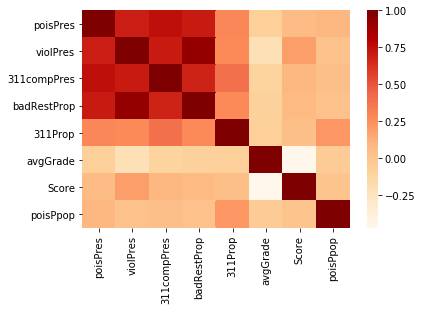

In [41]:
sns.heatmap(AllNT[['poisPres', 'violPres', '311compPres', 'badRestProp', '311Prop', 'avgGrade', 'Score', 'poisPpop']].corr(), 
           cmap='OrRd')